# Python Boot Camp


Welcome! 😃👋

In this notebook, we will go through some basic image processing in Python, come across standard tasks required while setting up deep learning pipelines, and familiarize ourselves with popular packages such as `glob`, `tifffile`, `tqdm`, `albumenations` and more.
We will learn about:
- Loading images (This is important as images are the primary input to most deep learning models)
- Normalizing images (This is important as it helps in faster convergence of models becuse it helps in reducing the scale of the input data and hence the scale of the gradients)
- Cropping images (This is important as it helps in creating smaller images from the original images which is useful for training models in a memory efficient way)
- Downsampling images (This is important as it helps in reducing the size of the images which is useful for training models in a memory efficient way)
- Flipping images (This is important as it helps in creating new images from the original data which is useful for training models in a memory efficient way)
- Batching images (As we train in a SGD manner, batching is important as it helps in training the model in a memory efficient way and smoothens the optimization process)
- Convolutions (This is important as it is the primary operation in Convolutional Neural Networks)
- Data Augmentation (This is important as it helps in artificially increasing the size of the training data which is useful for training models in a memory efficient way)


We will be using sample images from the *MoNuSeg* dataset provided by [Kumar et al, 2018](https://ieeexplore.ieee.org/document/8880654). The data was publicly made available [here](https://monuseg.grand-challenge.org/) by the authors of the publication.

This dataset shows Hematoxylin and Eosin (H&E) Stained Images showing nuclei in different shapes.

## Chapter 0: Downloading data from an external url

Let us first download the images from an external url.
To do so, we need to import some commonly used dependencies.

In [65]:
from pathlib import Path
import urllib.request, zipfile

Here, below is a helper function to download the data from an external url specified by argument `zip_url` and save it to a local directory specified by argument `project_name`. Let's execute the function (No output expected yet!).

In [66]:
def extract_data(zip_url, project_name):
    zip_path = Path(project_name + ".zip")
    if zip_path.exists():
        print("Zip file was downloaded and extracted before!")
    else:
        urllib.request.urlretrieve(zip_url, zip_path)
        print("Downloaded data as {}".format(zip_path))
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall("./")
    print("Unzipped data to {}".format(Path(project_name)))

Now we call the function `extract_data` specifying desirable values of the arguments.

In [67]:
extract_data(
    zip_url="https://owncloud.mpi-cbg.de/index.php/s/xwYonC9LucjLsY6/download",
    project_name="monuseg-2018",
)

Zip file was downloaded and extracted before!
Unzipped data to monuseg-2018


### Task 0.1
Click on the `Files` directory (left panel) and check if some images exist within the `monuseg-2018` directory.

### Task 0.2
Can you a bash command to programmatically count the number of images and masks present in the `download/images` directory.

*Hint*: Use `!ls -l <path> | wc - l` (you can run any bash command in a jupyter notebook by prefixing it with `!`)

In [ ]:
##########################
######## To Do ###########
##########################

In [68]:
##########################
####### Solution #########
##########################

!ls -l monuseg-2018/download/images | wc -l

15


## Chapter 1

### Images as arrays <a class="anchor" name="first"></a>

2D Images are often represented as numpy arrays of shape (`height`, `width`, `num_channels`).

![RGB image as a np array](https://github.com/dlmbl/boot/assets/34229641/ce1ad3f3-dc34-46d1-b301-198768fbc369)

<div style="text-align: right"> Credit: <a href="https://e2eml.school/convert_rgb_to_grayscale.html">Brandon Rohrer’s Blog</a></div>


Multiple utilities/packages exist to read images from files in Python.
For example, one can use `tifffile.imread` to read `*.tif` images. <br>Another good package is `skimage.io.imread`.


If you look in the directory (`monuseg-2018/download`), you can see directories called `images` and `masks`.

Let's load one image and visualize it using `matplotlib.pyplot.imshow`. <br>
`matplotlib.pyplot.imshow` is the standard way to show images in jupyter notebooks!

Image `img` has type <class 'numpy.ndarray'>


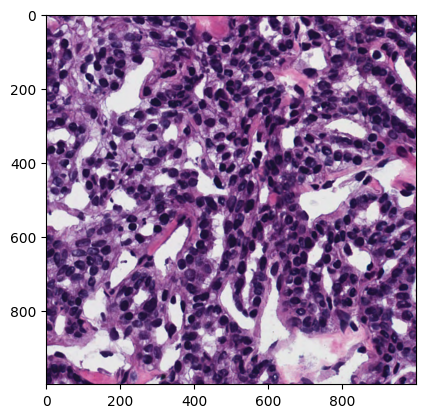

In [76]:
from tifffile import imread
import matplotlib.pyplot as plt

img = imread("monuseg-2018/download/images/TCGA-2Z-A9J9-01A-01-TS1.tif")
print(f"Image `img` has type {type(img)}")  # variable type
plt.imshow(img)

<div class="alert alert-info">

### Task 1.1
Can you visualize the corresponding `mask` for the image above. <br>
(*Hint*: Look for the same name within the `masks` directory.) <br>
What does the mask show?

In [ ]:
##########################
######## To Do ###########
##########################

mask = ...  # TODO
print(f"Mask `mask` has type {type(mask)}")  # variable type
plt.imshow(mask)

Mask `mask` has type <class 'numpy.ndarray'>


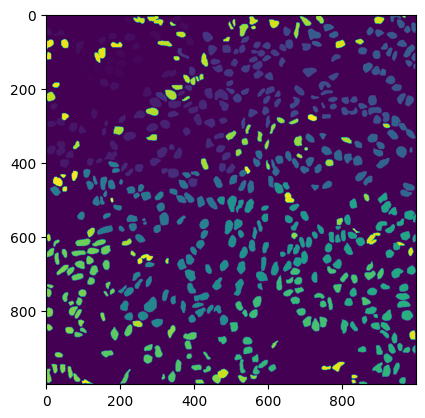

In [69]:
##########################
####### Solution #########
##########################

mask = imread("monuseg-2018/download/masks/TCGA-2Z-A9J9-01A-01-TS1.tif")
print(f"Mask `mask` has type {type(mask)}")  # variable type
plt.imshow(mask)

### Image channels
If the image is a `grayscale` image, then the number of channels is equal to $1$,
in which case the array can also be of shape (height, width). <br>
If the image is `RGB`, then the number of channels is $3$.
with each channel encoding the red, green and blue components.

<div class="alert alert-info">

### Task 1.2
Is <code>img</code> RGB or grayscale ? What about the mask?

*Hint*: <a href="https://assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf">np cheatsheet</a>

In [ ]:
##########################
######## To Do ###########
##########################

In [70]:
##########################
######## Solution ###########
##########################

print(img.shape)
print(mask.shape)

(1000, 1000, 3)
(1000, 1000)


```
##########################
####### Solution #########
##########################
```
The shape of the np array can tell us if the image is RGB or grayscale.
If the shape is (height, width, 3), then the image is RGB.
If the shape is (height, width), then the image is grayscale. Therefore:
- Mask = greyscale
- Image = RGB

### Image data types


Images can be represented by a variety of data types. The following is a list of the most common datatypes:
- `bool`: binary, 0 or 1
- `uint8`: unsigned integers, 0 to 255 range
- `float`: -1 to 1 or 0 to 1

<div class="alert alert-info">

### Task 1.3
What is the data type of <code>img</code> and the <code>mask</code> ? What are the minimum and maximum intensity values?

*Hint*: <a href="https://assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf">np cheatsheet</a></div>

In [ ]:
##########################
######## To Do ###########
##########################

In [71]:
##########################
####### Solution #########
##########################

print("data type: ", img.dtype, mask.dtype)
print("Image min and max: ", img.min(), img.max())
print("Mask min and max: ", mask.min(), mask.max())

data type:  uint8 uint16
Image min and max:  0 255
Mask min and max:  0 575


### Reshaping Images

`PyTorch`, `TensorFlow` and `JAX` are popular deep learning frameworks.
<br> In `PyTorch` images are represented as (`num_channels`, `height`, `width`).

But the image which we are working with has the `channel` as the last axis.
Therefore, we need to reshape (by swapping) the image to the correct shape.

<div class="alert alert-info">

### Task 1.4
Reshape <code>img</code> such that its shape is <code>(num_channels, height, width)</code>

*Hint*: <a href="https://numpy.org/doc/stable/reference/generated/numpy.transpose.html">np transpose</a>

In [ ]:
##########################
######## To Do ###########
##########################

import numpy as np

print(f"Before reshaping, image has shape {img.shape}")
img_reshaped = ...  ## TODO
print(f"After reshaping, image has shape {img_reshaped.shape}")

In [72]:
##########################
####### Solution #########
##########################

import numpy as np

print(f"Before reshaping, image has shape {img.shape}")
img_reshaped = np.transpose(img, (2, 0, 1))
print(f"After reshaping, image has shape {img_reshaped.shape}")

Before reshaping, image has shape (1000, 1000, 3)
After reshaping, image has shape (3, 1000, 1000)


### Normalizing Images

It often helps model training, if we provide image inputs to the model which are between [0,1] intensities. <br>
This is because the gradients are more stable and the model converges faster. And the model is not biased towards any particular intensity values. <br>
One way of normalizing an image is to divide the intensity on each pixel by the maximum allowed intensity for the available data type.

<div class="alert alert-info">

### Task 1.5
Obtain an intensity normalized image using the idea above.

In [ ]:
##########################
######## To Do ###########
##########################

def normalize(img):
    norm_img = ...  # TODO
    return norm_img

In [73]:
##########################
####### Solution #########
##########################

def normalize(img):
    norm_img = img / 255
    return norm_img

<div class="alert alert-info">

### Task 1.6
What is the data type of the normalized image. Has it changed from before? Why?

In [ ]:
##########################
######## To Do ###########
##########################

In [74]:
##########################
####### Solution #########
##########################

normalize(img).dtype

dtype('float64')

### Loading a set of images

Given a set of images in a folder, we need to be able to easily find the pathnames and load them in. <br>
`glob` is a standard package that provides a utility for finding all pathnames that match a given pattern.

Here, our images have the `.tif` extension.

In [75]:
import os
from glob import glob

img_dir = "monuseg-2018/download/images/"
img_filenames = sorted(glob(os.path.join(img_dir, "*.tif")))

print(f"Found:")
for img_filename in img_filenames:
    print(f"{img_filename}")

Found:
monuseg-2018/download/images/TCGA-2Z-A9J9-01A-01-TS1.tif
monuseg-2018/download/images/TCGA-44-2665-01B-06-BS6.tif
monuseg-2018/download/images/TCGA-69-7764-01A-01-TS1.tif
monuseg-2018/download/images/TCGA-A6-6782-01A-01-BS1.tif
monuseg-2018/download/images/TCGA-AC-A2FO-01A-01-TS1.tif
monuseg-2018/download/images/TCGA-AO-A0J2-01A-01-BSA.tif
monuseg-2018/download/images/TCGA-CU-A0YN-01A-02-BSB.tif
monuseg-2018/download/images/TCGA-EJ-A46H-01A-03-TSC.tif
monuseg-2018/download/images/TCGA-FG-A4MU-01B-01-TS1.tif
monuseg-2018/download/images/TCGA-GL-6846-01A-01-BS1.tif
monuseg-2018/download/images/TCGA-HC-7209-01A-01-TS1.tif
monuseg-2018/download/images/TCGA-HT-8564-01Z-00-DX1.tif
monuseg-2018/download/images/TCGA-IZ-8196-01A-01-BS1.tif
monuseg-2018/download/images/TCGA-ZF-A9R5-01A-01-TS1.tif


<div class="alert alert-info">

### Task 1.7
Load the set of masks, by correctly specifying the value of the variables `mask_dir` and `mask_filenames`

In [ ]:
##########################
######## To Do ###########
##########################

mask_dir = ...  # TODO: fill value!!
mask_filenames = ...  # TODO: fill value!!
for mask_filename in mask_filenames:
    print(f"{mask_filename}")

In [77]:
##########################
####### Solution #########
##########################

mask_dir = "monuseg-2018/download/masks/"
mask_filenames = sorted(glob(os.path.join(mask_dir, "*.tif")))
for mask_filename in mask_filenames:
    print(f"{mask_filename}")

monuseg-2018/download/masks/TCGA-2Z-A9J9-01A-01-TS1.tif
monuseg-2018/download/masks/TCGA-44-2665-01B-06-BS6.tif
monuseg-2018/download/masks/TCGA-69-7764-01A-01-TS1.tif
monuseg-2018/download/masks/TCGA-A6-6782-01A-01-BS1.tif
monuseg-2018/download/masks/TCGA-AC-A2FO-01A-01-TS1.tif
monuseg-2018/download/masks/TCGA-AO-A0J2-01A-01-BSA.tif
monuseg-2018/download/masks/TCGA-CU-A0YN-01A-02-BSB.tif
monuseg-2018/download/masks/TCGA-EJ-A46H-01A-03-TSC.tif
monuseg-2018/download/masks/TCGA-FG-A4MU-01B-01-TS1.tif
monuseg-2018/download/masks/TCGA-GL-6846-01A-01-BS1.tif
monuseg-2018/download/masks/TCGA-HC-7209-01A-01-TS1.tif
monuseg-2018/download/masks/TCGA-HT-8564-01Z-00-DX1.tif
monuseg-2018/download/masks/TCGA-IZ-8196-01A-01-BS1.tif
monuseg-2018/download/masks/TCGA-ZF-A9R5-01A-01-TS1.tif


Let's visualize some of the images and the corresponding mask, side by side. First let's provide a helper `visualize` function which takes two images as argument.


In [78]:
import matplotlib.pyplot as plt

def visualize(im1, im2):
    plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.imshow(im1)
    plt.subplot(122)
    plt.imshow(im2)
    plt.tight_layout()

Executing the cell below, would visualize a new random image and the corresponding segmentation mask, each time. This is because the variable `idx` gets a new value between $0$ and $14$ (there are $15$ images).

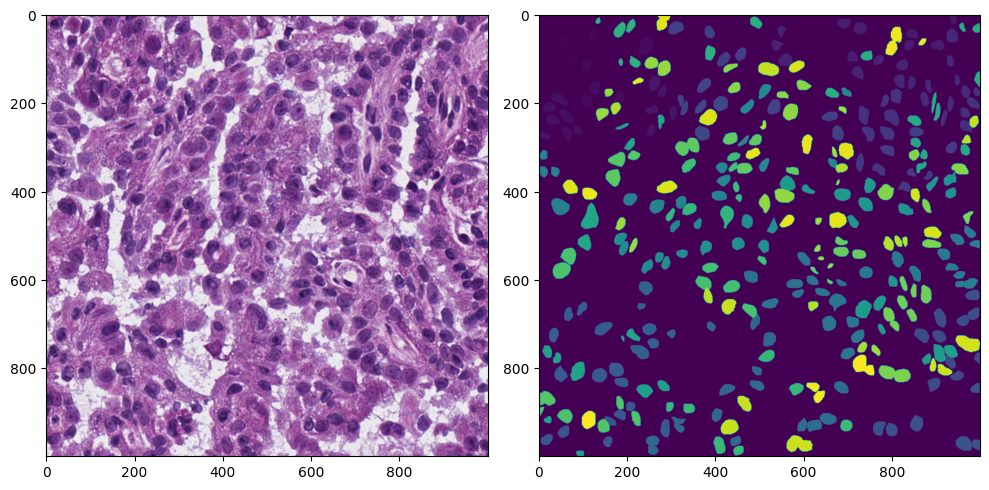

In [79]:
idx = np.random.randint(len(img_filenames))
visualize(imread(img_filenames[idx]), imread(mask_filenames[idx]))

<div class="alert alert-success">

## Checkpoint 1

Great Job! 🎊 Please post in the chat when you reach this checkpoint.

In the first chapter, we learned about:

<li> image data types</li>
<li> reshaping images </li>
<li> normalizing images </li>
<li> Using <code>glob</code> to load a set of images

These are important concepts to understand as they form the basis of most image processing pipelines because they are the basic data handling operations.

<hr>
</div>

**Bonus Task for Chapter 1**: Can you think of alternate approaches to intensity normalization? Any benefits of following one over the other?

Another approach could be percentile normalization. This maps the min intensity to 0 and max intensity to 0. This is useful if there are

## Chapter 2
### Cropping

While training models, we usually feed in smaller crops extracted from the original images.
To do so, we can rely on the powerful numpy [indexing](https://numpy.org/doc/stable/user/basics.indexing.html).

For example, let's extract the top left corner from one of our images.

In the cell below, the original image is visualized on the left and the cropped image is seen on the right.

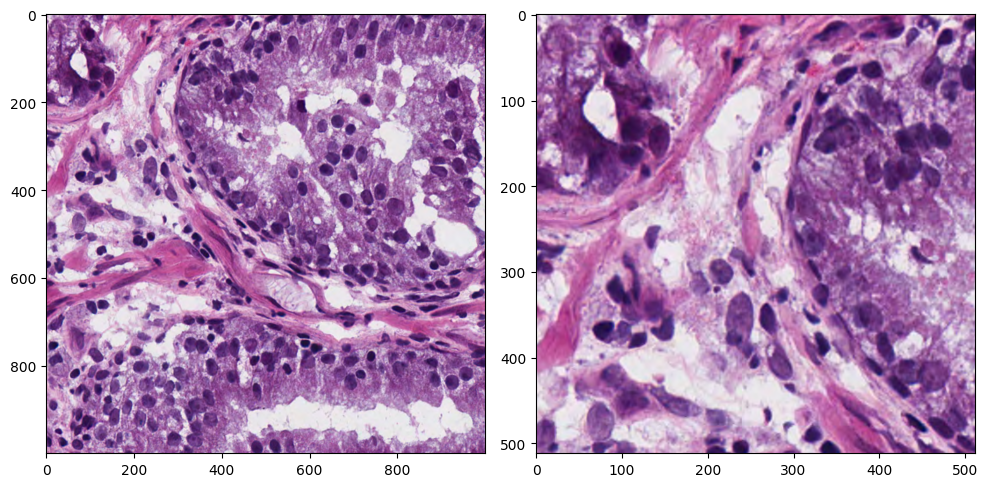

In [80]:
idx = np.random.randint(len(img_filenames))
img = imread(img_filenames[idx])
cropped_img = img[0:512, 0:512, :]
visualize(img, cropped_img)

<div class="alert alert-info">

### Task 2.1
Visualize the bottom left portion of any  image

In [ ]:
##########################
######## To Do ###########
##########################

idx = np.random.randint(len(img_filenames))
img = imread(img_filenames[idx])
cropped_img = ...  # TODO : fill correct value!!
visualize(img, cropped_img)

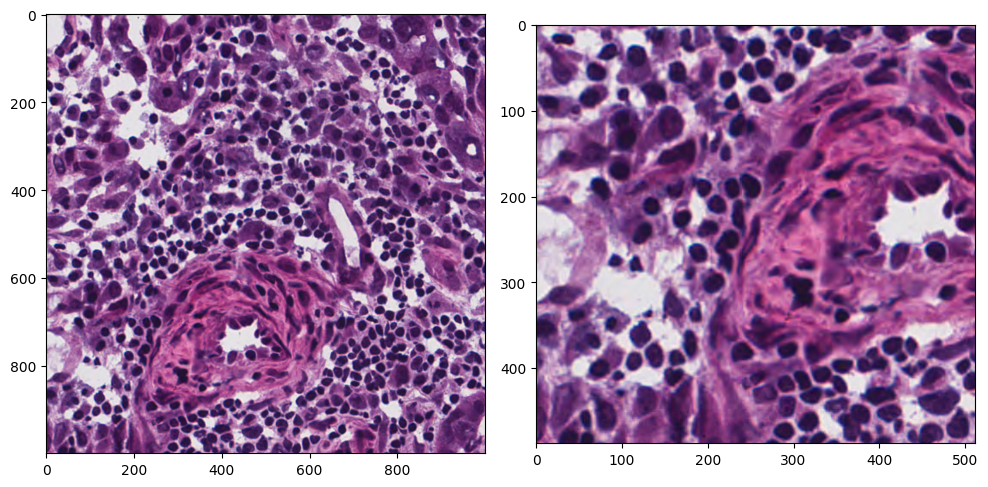

In [81]:
##########################
####### Solution #########
##########################

idx = np.random.randint(len(img_filenames))
img = imread(img_filenames[idx])
cropped_img = img[512:, 0:512, :]
visualize(img, cropped_img)

### Downsampling

For large images, sometimes we require that they are downsampled to fit in memory.

Say if one wants to have every fourth pixel from the original image, one specifies `factor` = $4$, and one can run the following cell:

Original image shape: (1000, 1000, 3)
Downsampled image shape: (250, 250, 3)


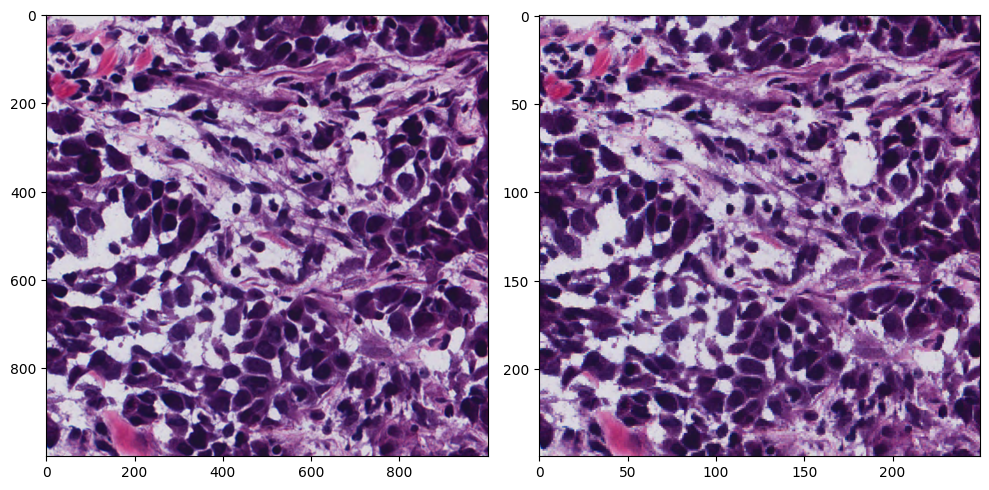

In [82]:
# downsampling
idx = np.random.randint(len(img_filenames))
img = imread(img_filenames[idx])

factor = 4
downsampled_img = img[::factor, ::factor]
print(f"Original image shape: {img.shape}")
print(f"Downsampled image shape: {downsampled_img.shape}")

# Let's visualize the original image and the downsampled image side by side
visualize(img, downsampled_img)

<div class="alert alert-info">

### Task 2.2
Can you see that the image on the right lacks some detail on account of being downsampled.

Try other values of the downsampling factors `factor`.

In [ ]:
##########################
######## To Do ###########
##########################

factor = ...
downsampled_img = img[::factor, ::factor]
visualize(img, downsampled_img)

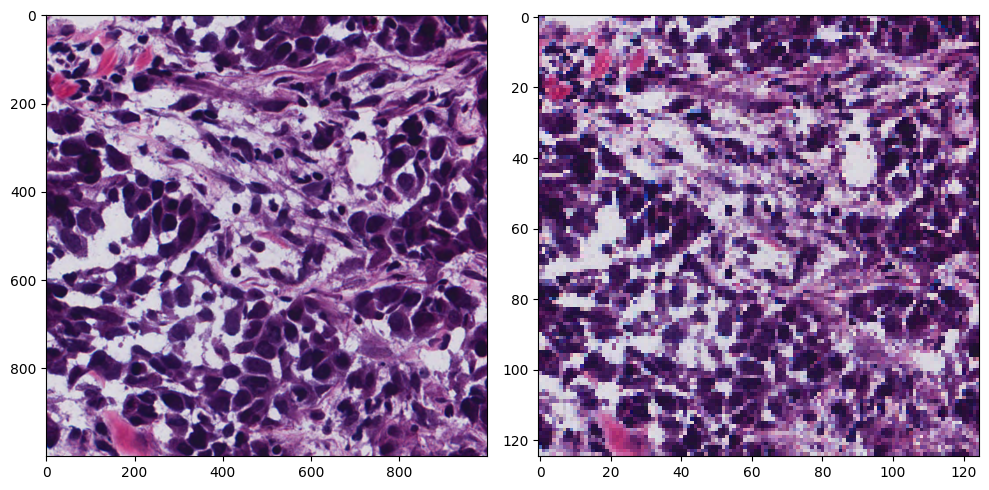

In [83]:
##########################
####### Solution #########
##########################

factor = 8
downsampled_img = img[::factor, ::factor]
visualize(img, downsampled_img)

### Flipping

Sometimes, one wishes to create new images from original data by performing transformations.

One way to create a new image is by flipping an image about a given axis, which creates a mirror image!

Run the following cell to visualize a vertically flipped image.

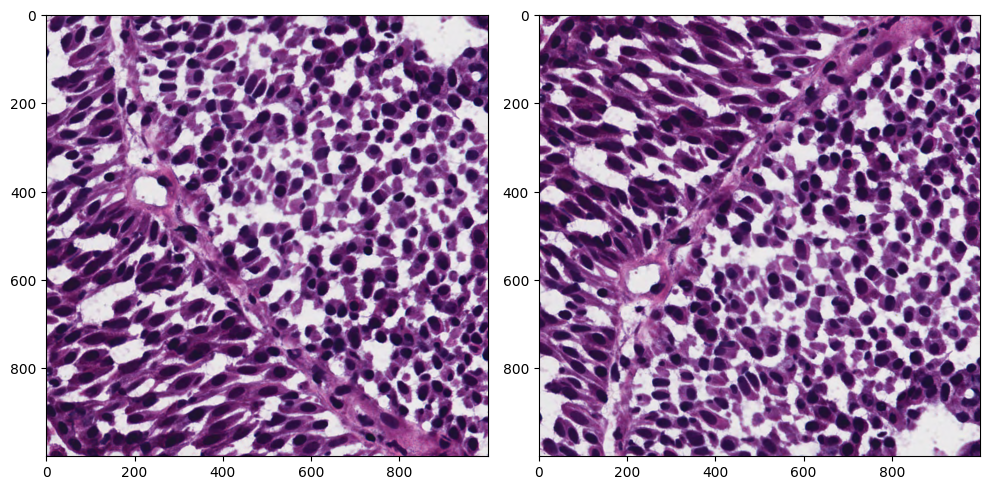

In [84]:
idx = np.random.randint(len(img_filenames))
img = imread(img_filenames[idx])
# Here the image dimensions are (height, width, num_channels), ::-1 means reverse the order of the elements in the array on the height axis
vflipped_img = img[::-1, :, :]
visualize(img, vflipped_img)

<div class="alert alert-info">

### Task 2.3
Create a horizontally flipped image and visualize!

In [ ]:
##########################
######## To Do ###########
##########################

idx = np.random.randint(len(img_filenames))
img = imread(img_filenames[idx])
hflipped_img = ...  ## TODO: fill correct value
visualize(img, hflipped_img)

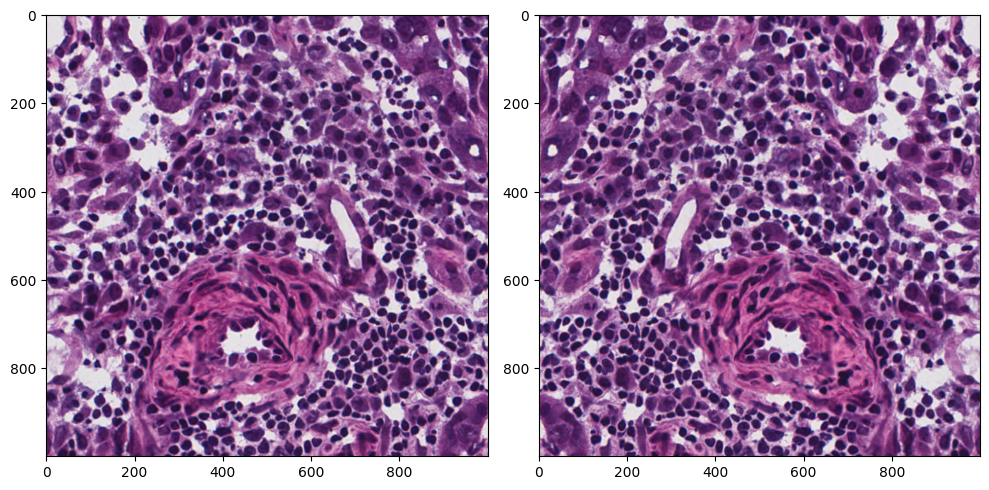

In [85]:
##########################
####### Solution #########
##########################

idx = np.random.randint(len(img_filenames))
img = imread(img_filenames[idx])
hflipped_img = img[:, ::-1, :]  
visualize(img, hflipped_img)

<div class="alert alert-success">

<hr>
Fantastic Work! 🙏 Please post on the course chat when you reach this checkpoint.

## Checkpoint 2

In the second chapter, we learnt about:

<li> cropping images </li>
<li> downsampling images </li>
<li> flipping images </li>

These operations are important as they help in creating new images from the original data.
These are also ways of basic data augmentation which is useful for training models.

<hr>
</div>

**Bonus Task for Chapter 2**

Can you think of reasons why we need to crop images?
Can't we feed in all the images at the original size to the model?

1. To increase the amount of data i.e, have more training data and corresponding masks
2. Also because often the training images come with different sizes and this creates an issue while `batching` the images

## Chapter 3
### Batching

In ML/DL, we often have to deal with very large datasets. It soon becomes inefficient to process all the data at once, so it's useful to split the data into "mini-batches" that we can process individually.

So for purely reasons of computational cost, this is often useful.

We will also see another reason for which batching can be useful - for instance when running gradient descent on non-convex landscapes.
Here, computing the gradient on a subset of the data gives us an approximate/noisy gradient making it less likely for us to end up being stuck in local minima. This is what is referred to as "stochastic gradient descent".

Let us make our first batch of images, containing $B$ number of images.
The shape of the batch will thus get an additional "batch dimension" at the first dimension, i.e. (batch_size, num_channels, height, width).

<div class="alert alert-info">

### Task 3.1

Make a batch of size $B=4$ by sampling 4 images randomly from the available images (this will be a 4D np array).
<br> Here, you would also have to ensure that the second axis corresponds to the channel (use `np.transpose`)

In [ ]:
##########################
######## To Do ###########
##########################

# `batch` should be a np array with shape (4, 3, 1000, 1000).

batch = ...  # TODO
print(f"Batch of images has shape {batch.shape}")

In [86]:
##########################
####### Solution #########
##########################

indices = np.random.choice(len(img_filenames), 4, replace=False)
imgs = []
for index in indices:
    imgs.append(np.transpose(imread(img_filenames[index]), (2, 0, 1)))
batch = np.asarray(imgs)
print(f"Batch of images has shape {batch.shape}")

Batch of images has shape (4, 3, 1000, 1000)


### Convolutions

Convolutions are the elementary operations used in Convolutional Neural Networks (CNNs). <br> The images (and later, the feature maps) are convolved with multiple filters whose weights are learned. <br>

![](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)


Please read this [section](https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution) on convolutions to learn how to implement a your own convolution function!

<div class="alert alert-info">

### Task 3.2
Implement a function that performs a convolution of an image with a filter.
<br> Assume that your image is square and that your filter is square and has an odd width. You can set arbitrary values in your filter for now.

<br> Note that your output image will be smaller.

In [ ]:
##########################
######## To Do ###########
##########################


def conv2d(img, kernel):
    assert kernel.shape[0] == kernel.shape[1]
    assert kernel.shape[0] % 2 != 0

    h, w = img.shape[0], img.shape[1]  # Starting size of image
    d_k = kernel.shape[0]  # Size of kernel

    h_new = h - d_k + 1  # Calculate the new height of the array
    w_new = w - d_k + 1  # Calculate the new width of the array
    output = np.zeros((h_new, w_new))

    # TODO: add your code for filling output with the convolved image

    return output

In [87]:
##########################
####### Solution #########
##########################


def conv2d(img, kernel):
    assert kernel.shape[0] == kernel.shape[1]
    assert kernel.shape[0] % 2 != 0

    h, w = img.shape[0], img.shape[1]  # Starting size of image
    d_k = kernel.shape[0]  # Size of kernel

    h_new = h - d_k + 1
    w_new = w - d_k + 1
    output = np.zeros((h_new, w_new))

    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            output[i, j] = np.sum(img[i : i + d_k, j : j + d_k] * kernel)
    return output

(1000, 1000)
(998, 998)


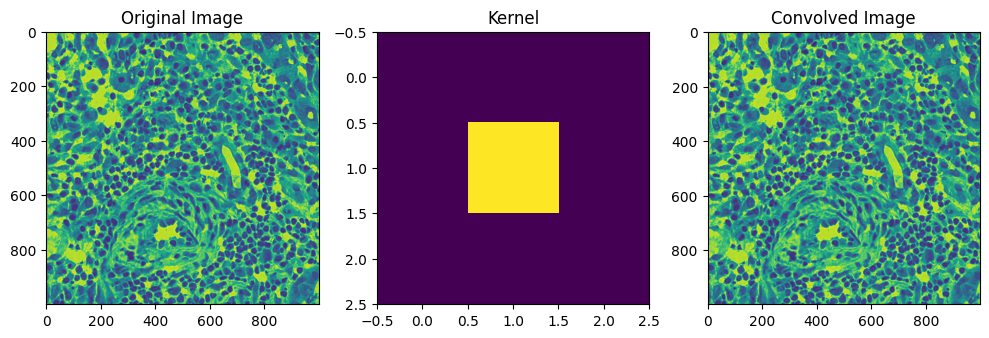

In [88]:
# Run this cell to check your function

identity = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
new_im = conv2d(img[..., 0], identity)
# Lets print the original image and the convolved image
print(img[..., 0].shape)
print(new_im.shape)

#Lets visualize the original image and the convolved image and the filter
plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(img[..., 0])
plt.title("Original Image")
plt.subplot(132)
plt.imshow(identity)
plt.title("Kernel")
plt.subplot(133)
plt.imshow(new_im)
plt.title("Convolved Image")
plt.tight_layout()

**Bonus: Try differnt (arbitary?) filters and see how the output changes!**

<div class="alert alert-info">

### Task 3.3

We noticed that the output image is smaller than the input image! <br>

Can you come up with an analytical relationship regarding how much smaller the output image is *vis-à-vis* the input image? <br>
Can you think of any strategy which ensures that the output image is the same size as the input image?

In [ ]:
##########################
######## To Do ###########
##########################


```
##########################
####### Solution #########
##########################
```

- Given an input image of size $H \times W$, a filter of size $K_h \times K_w$ , and strides $S_h$ and $S_w$
the output size (height $H_{out}$ and width $W_{out}$) can be calculated using the following formulas (Note that $\lfloor.\rfloor$ is the floor operator):

$$
\begin{equation*}
    H_{out} = \left\lfloor \frac{H - K_h}{S_h} \right\rfloor + 1
\end{equation*}
$$
$$
\newline
\begin{equation*}
    W_{out} = \left\lfloor \frac{W - K_w}{S_w} \right\rfloor + 1
\end{equation*}
$$
- We can add padding to the input image to ensure that the output image is the same size as the input image.

### Filters

Let us try to understand what could the values of the filter be. <br>


<div class="alert alert-info">

The following is known as the Sobel filter:

$$
\begin{bmatrix}
    1 & 2 & 1 \\
    0 & 0 & 0 \\
    -1 & -2 & -1
\end{bmatrix}
$$

### Task 3.4
Apply the Sobel filter and describe what it does

In [ ]:
##########################
######## To Do ###########
##########################

flter = ...  # TODO
output_img = conv2d(img[..., 0], flter)
visualize(img[..., 0], output_img)

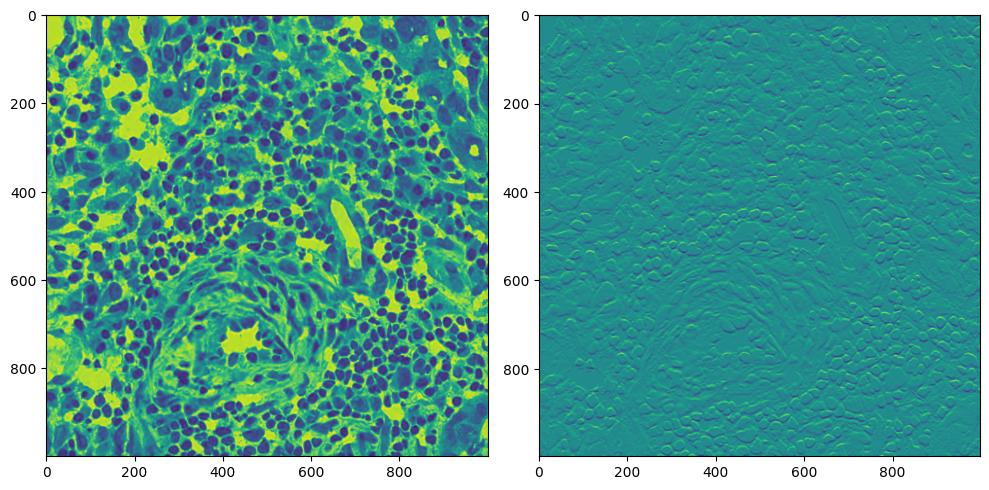

In [89]:
##########################
####### Solution #########
##########################

flter = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
output_img = conv2d(img[..., 0], flter)
visualize(img[..., 0], output_img)

<div class="alert alert-info">

### Task 3.5

What feature in this image do you think this filter is detecting?

In [ ]:
##########################
######## To Do ###########
##########################

```
##########################
####### Solution #########
##########################
```

The Sobel filter is detecting the edges in the image.

<div class="alert alert-success">

<hr>
Wow! 🤟 Post on the course chat when you reach this checkpoint!

## Checkpoint 3

In the third chapter, we learnt about:

<li> Batching (here we understood the importance of batching in training models) </li>
<li> Convolutions (The primary operation in Convolutional Neural Networks) </li>
<li> Filters (The weights that are learned in Convolutional Neural Networks) </li>

<hr>

## Chapter 4: (Optional) Data augmentation

Having collected your hard earned data you want to make the most of it. In ML/DL, we're often limited by the size of our the training set. How could we artificially inflate our data to provide more input to our model and help it generalize better?

One trick is to make simple transformations to our data such as rotating it or adding noise - this process is generally called "data augmentation" (DA) and is widely used in ML.

`albumentations` is a Python library that provides a very extensive set of image augmentations,
and that seamlessly handles complex annotations like segmentation maps, bounding boxes or keypoints. Let us import `albumentations` and its dependency `cv2` in the cell below.

In [ ]:
import albumentations as A
import cv2

### Applying one augmentation

To use an augmentation, we can instantiate a transformation with a set of hyperparameters.
With a rotation, for example, we can specify the range of the rotation angle to be `(-45, 45)` degrees, always applied, and have a constant border around the rotation.

In `albumentations`, the channel-axis is always expected to be the last axis and may be skipped for grayscale images. It is
also recommended to work with the `uint8` dtype.

In [ ]:
rotate = A.Rotate(limit=45, always_apply=True, border_mode=cv2.BORDER_CONSTANT)
idx = np.random.randint(len(img_filenames))
img = imread(img_filenames[idx])
img_aug = rotate(image=img)
visualize(img, img_aug["image"])

### Applying multiple augmentations
We can compose multiple augmentations. Run this cell multiple times to see how the output changes!

In [ ]:
augment = A.Compose(
    [
        A.RandomCrop(width=256, height=256),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        rotate,
    ]
)
img_aug = augment(image=img)
visualize(img, img_aug["image"])

<div class="alert alert-info">

### Task 4.1
Familiarize yourself with the different augmentations available through `albumentations`.

Refer to the [examples](https://albumentations.ai/docs/examples/),  [tutorial](https://albumentations.ai/docs/getting_started/mask_augmentation/) and the [documentation](https://albumentations.ai/docs/).

Identify and apply augmentations that you think are interesting.

In [ ]:
##########################
######## To Do ###########
##########################

<div class="alert alert-info">

### Task 4.2
While augmenting images and segmentation masks, should they be augmented similarly or differently? Discuss.

In [ ]:
##########################
######## To Do ###########
##########################

```
##########################
####### Solution #########
##########################
```

The same geometric transform should be applied to both the images and the corresponding segmentation masks.

<div class="alert alert-success">

<hr>
Hurrah! 😃

## Checkpoint 4

In the fourth chapter, we learnt about:

<li> Using <code>albumentations</code> for augmenting images </li>
<li> Putting together multiple augmentations using <code>A.Compose</code></li>
<hr>